# 2022년 데이터이기 때문에 현재와 다른점이 있는걸 감안해야합니다.

2022년 Agent 총 수 : 19
Neon Fade Breach Chamber Omen <br>
KAY/O Skye Raze Brimstone Yoru<br>
Viper Sova Jett Reyna Killjoy<br>
Cypher Sage Astra Phoenix<br>

현재 agent 수 : 24
"Duelist": ["Phoenix", "Jett", "Yoru", "Iso", "Raze", "Reyna", "Neon"], 7 <br>
"Initiator": ["Gekko", "Breach", "Sova", "Skye", "KAY/O", "Fade"], 5<br>
"Controller": ["Viper", "Brimstone", "Astra", "Omen", "Clove", "Harbor"], 6<br>
"Sentinel": ["Deadlock", "Cypher", "Sage", "Chamber", "Killjoy"] 5<br>

2022년 맵 총 수 :8개 중 4개 (4개 삭제)
1.	Haven
2.	Bind
3.	Breeze (삭제)
4.	Ascent
5.	Icebox
6.	Split  (삭제)
7.	Fracture  (삭제)
8.	Pearl  (삭제)

현재 맵 총 수 : 11개중 6개 (5개 삭제)
1.	스플릿 (삭제)
2.	바인드
3.	헤이븐
4.	어센트
5.	아이스박스
6.	브리즈 (삭제)
7.	프랙처 (삭제)
8.	펄 (삭제)
9.	로터스
10.	선셋
11.	어비스 (삭제)



In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2024.06.15_발로란트api안됨.ipynb    Valorant_crawling.ipynb	 valorant_분석.ipynb
2024.06.19_valorant_다른사람.ipynb  valorant_matches_1-78.xlsx	 VAL-STATUS-V1.json
VAL-CONTENT-V1.json		    valorant_matches_1-96.xlsx
Valorant			    valorant_matches_final.xlsx


In [2]:
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm


In [3]:
df_original = pd.read_excel(f"valorant_matches_final.xlsx")

In [4]:
df = df_original.copy()
df.head()

,league,map,선수명,팀명,사용요원,ACS,KDA,+/-,ADR,Hs%,WL,리그 정보
0,1,All Maps,spy,FLC,"['Neon', 'Skye', 'Neon', 'Skye']",178,78 / 43 / 7,35,110,23%,1,Finals 2022
1,1,All Maps,OuTLaW,FLC,"['Viper', 'Fade', 'Viper', 'Fade']",194,88 / 48 / 17,40,120,30%,1,Finals 2022
2,1,All Maps,Fr4nky,FLC,"['Sova', 'Breach', 'Sova', 'Breach']",172,66 / 46 / 25,20,124,23%,1,Finals 2022
3,1,All Maps,aLvAr,FLC,"['Jett', 'Chamber', 'Raze', 'Jett', 'Chamber',...",212,96 / 38 / 6,58,135,31%,1,Finals 2022
4,1,All Maps,Moh,FLC,"['Reyna', 'Brimstone', 'Omen', 'Reyna', 'Brims...",194,82 / 43 / 18,39,131,32%,1,Finals 2022


In [5]:
# 사용요원 자체는 24인데, 데이터에는 875개나!!
df['사용요원'].nunique()

1162

In [6]:
# one_map으로 바꿔도 데이터가 50개
One_map = df.loc[df['map'] != 'All Maps']
print(One_map['사용요원'].nunique())
One_map['사용요원'].unique()

62


array(["['Neon', 'Neon']", "['Fade', 'Fade']", "['Breach', 'Breach']",
       "['Chamber', 'Chamber']", "['Omen', 'Omen']", "['KAY/O', 'KAY/O']",
       "['Skye', 'Skye']", "['Raze', 'Raze']",
       "['Brimstone', 'Brimstone']", "['Yoru', 'Yoru']",
       "['Viper', 'Viper']", "['Sova', 'Sova']", "['Jett', 'Jett']",
       "['Reyna', 'Reyna']", "['Killjoy', 'Killjoy']",
       "['Cypher', 'Cypher']", "['Sage', 'Sage']", "['Astra', 'Astra']",
       "['Phoenix', 'Phoenix']",
       "[' The Ganaccis', 'Chamber', 'Chamber']",
       "[' The Ganaccis', 'Sova', 'Sova']",
       "[' The Ganaccis', 'Viper', 'Viper']",
       "[' The Ganaccis', 'Jett', 'Jett']",
       "[' The Ganaccis', 'KAY/O', 'KAY/O']",
       "[' The Ganaccis', 'Fade', 'Fade']",
       "[' The Ganaccis', 'Omen', 'Omen']",
       "[' The Ganaccis', 'Reyna', 'Reyna']",
       "[' The Ganaccis', 'Breach', 'Breach']",
       "[' The Ganaccis', 'Brimstone', 'Brimstone']",
       "[' The Ganaccis', 'Neon', 'Neon']",
       "['

In [7]:
df = One_map.copy()

def clean_agent_name(agent):
  try:
    # 문자열을 리스트로 변환
    agent_list = ast.literal_eval(agent)
    # 'The Ganaccis'와 'ACE'를 제거하는 함수
    cleaned_list = [agent.replace(' The Ganaccis', '').replace('ACE ', '').replace('NoX ', '').strip() for agent in agent_list]
    return cleaned_list
  except ValueError:
    return []

# '사용요원' 컬럼의 값을 정리
df['사용요원'] = df['사용요원'].apply(clean_agent_name)
df['사용요원'] = df['사용요원'].apply(lambda x: ''.join(set(x)).strip())
# 결과 출력
print(df['사용요원'].nunique())
print(df['사용요원'].unique())

19
['Neon' 'Fade' 'Breach' 'Chamber' 'Omen' 'KAY/O' 'Skye' 'Raze' 'Brimstone'
 'Yoru' 'Viper' 'Sova' 'Jett' 'Reyna' 'Killjoy' 'Cypher' 'Sage' 'Astra'
 'Phoenix']


In [8]:
# 맵 통일화
df['map'] = df['map'].apply(lambda x: x[1:].strip() if isinstance(x, str) else x)

# 직업군 추가
def assign_role(row):
    roles = {
        "Duelist": ["Phoenix", "Jett", "Yoru", "Iso", "Raze", "Reyna", "Neon"],
        "Initiator": ["Gekko", "Breach", "Sova", "Skye", "KAY/O", "Fade"],
        "Controller": ["Viper", "Brimstone", "Astra", "Omen", "Clove", "Harbor"],
        "Sentinel": ["Deadlock", "Cypher", "Sage", "Chamber", "Killjoy"]
    }

    for role, agents in roles.items():
        for agent in agents:
            if agent in row['사용요원']:
                return role

    return "Unknown"

df['직업군'] = df.apply(assign_role, axis=1)

# KDA 나누기
df[['K', 'D', 'A']] = df['KDA'].str.split(' / ', expand=True)
df.drop(columns=['KDA'], inplace=True)

# 헤드샷에 % 제거
df['Hs%'] = df['Hs%'].str.rstrip('%').astype(int)

In [9]:
# 숫자 데이터 형식 변환
df['ACS'] = pd.to_numeric(df['ACS'], errors='coerce')
df['K'] = pd.to_numeric(df['K'], errors='coerce')
df['D'] = pd.to_numeric(df['D'], errors='coerce')
df['A'] = pd.to_numeric(df['A'], errors='coerce')
df['ADR'] = pd.to_numeric(df['ADR'], errors='coerce')
df['Hs%'] = pd.to_numeric(df['Hs%'], errors='coerce')

# 리그와 맵을 기준으로 승패 계산
df['Win'] = df.groupby(['league', 'map'])['WL'].transform(lambda x: (x == x.max()).astype(int))
print(df[['league', 'map', '팀명', 'WL', 'Win']].head(20))

    league    map   팀명  WL  Win
10       1  Haven  FLC  13    1
11       1  Haven  FLC  13    1
12       1  Haven  FLC  13    1
13       1  Haven  FLC  13    1
14       1  Haven  FLC  13    1
15       1  Haven   AT   5    0
16       1  Haven   AT   5    0
17       1  Haven   AT   5    0
18       1  Haven   AT   5    0
19       1  Haven   AT   5    0
20       1   Bind  FLC   8    0
21       1   Bind  FLC   8    0
22       1   Bind  FLC   8    0
23       1   Bind  FLC   8    0
24       1   Bind  FLC   8    0
25       1   Bind   AT  13    1
26       1   Bind   AT  13    1
27       1   Bind   AT  13    1
28       1   Bind   AT  13    1
29       1   Bind   AT  13    1


In [10]:
df.head()

,league,map,선수명,팀명,사용요원,ACS,+/-,ADR,Hs%,WL,리그 정보,직업군,K,D,A,Win
10,1,Haven,spy,FLC,Neon,156,-2,94,19,13,Finals 2022,Duelist,10,12,2,1
11,1,Haven,OuTLaW,FLC,Fade,257,8,155,34,13,Finals 2022,Initiator,19,11,5,1
12,1,Haven,Fr4nky,FLC,Breach,206,-1,146,28,13,Finals 2022,Initiator,12,13,9,1
13,1,Haven,aLvAr,FLC,Chamber,289,12,194,44,13,Finals 2022,Sentinel,21,9,3,1
14,1,Haven,Moh,FLC,Omen,216,3,143,26,13,Finals 2022,Controller,14,11,4,1


#### 1. 사용요원 픽률

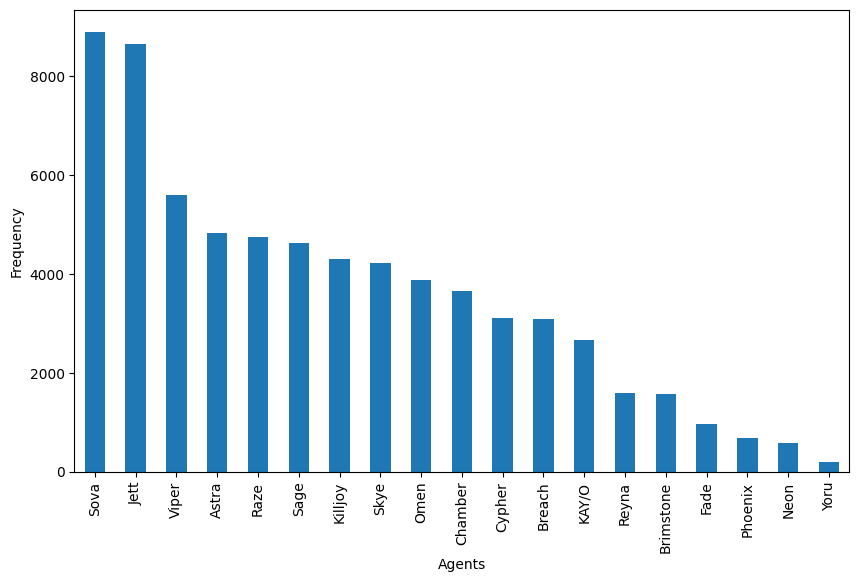

In [11]:
# 사용요원 count
agents_count =df.groupby('사용요원')['사용요원'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
agents_count.plot(kind='bar')
plt.xlabel('Agents')
plt.ylabel('Frequency')
plt.show()

In [12]:
# 각 맵별 ACS 평균
map_acs_avg = df.groupby('map')['ACS'].mean().reset_index()
print(map_acs_avg)

        map         ACS
0    Ascent  201.522105
1      Bind  200.963799
2    Breeze  199.481672
3  Fracture  200.362000
4     Haven  199.997797
5    Icebox  206.124823
6     Pearl  199.775000
7     Split  203.930891


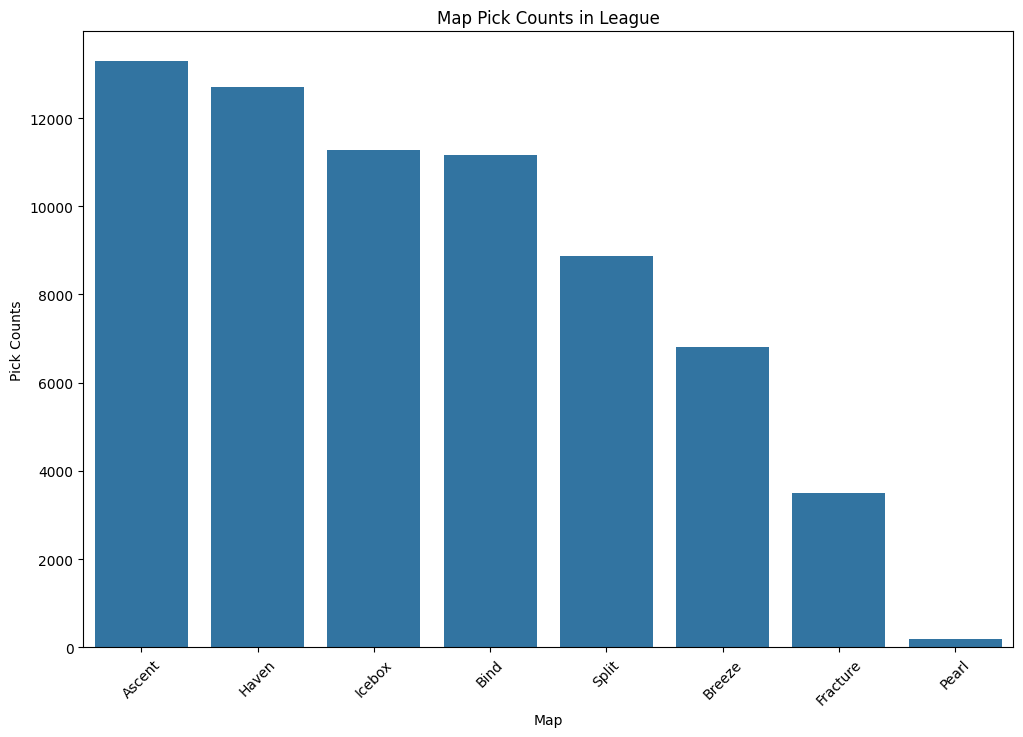

In [13]:
# 맴별 시각화

map_pick_rate = df['map'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=map_pick_rate.index, y=map_pick_rate.values)
plt.title('Map Pick Counts in League')
plt.xlabel('Map')
plt.ylabel('Pick Counts')
plt.xticks(rotation=45)
plt.show()

#### 2. 맵별 요원 출현 수

<ipython-input-14-fb34458f8264>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(map_df.index, rotation=45)
<ipython-input-14-fb34458f8264>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(map_df.index, rotation=45)
<ipython-input-14-fb34458f8264>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(map_df.index, rotation=45)
<ipython-input-14-fb34458f8264>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(map_df.index, rotation=45)
<ipython-input-14-fb34458f8264>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(map_df.index, rotation=45)
<ipython-input-14-fb34458f8264>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(map_df.index, rotation=45)
<ipython-input-1

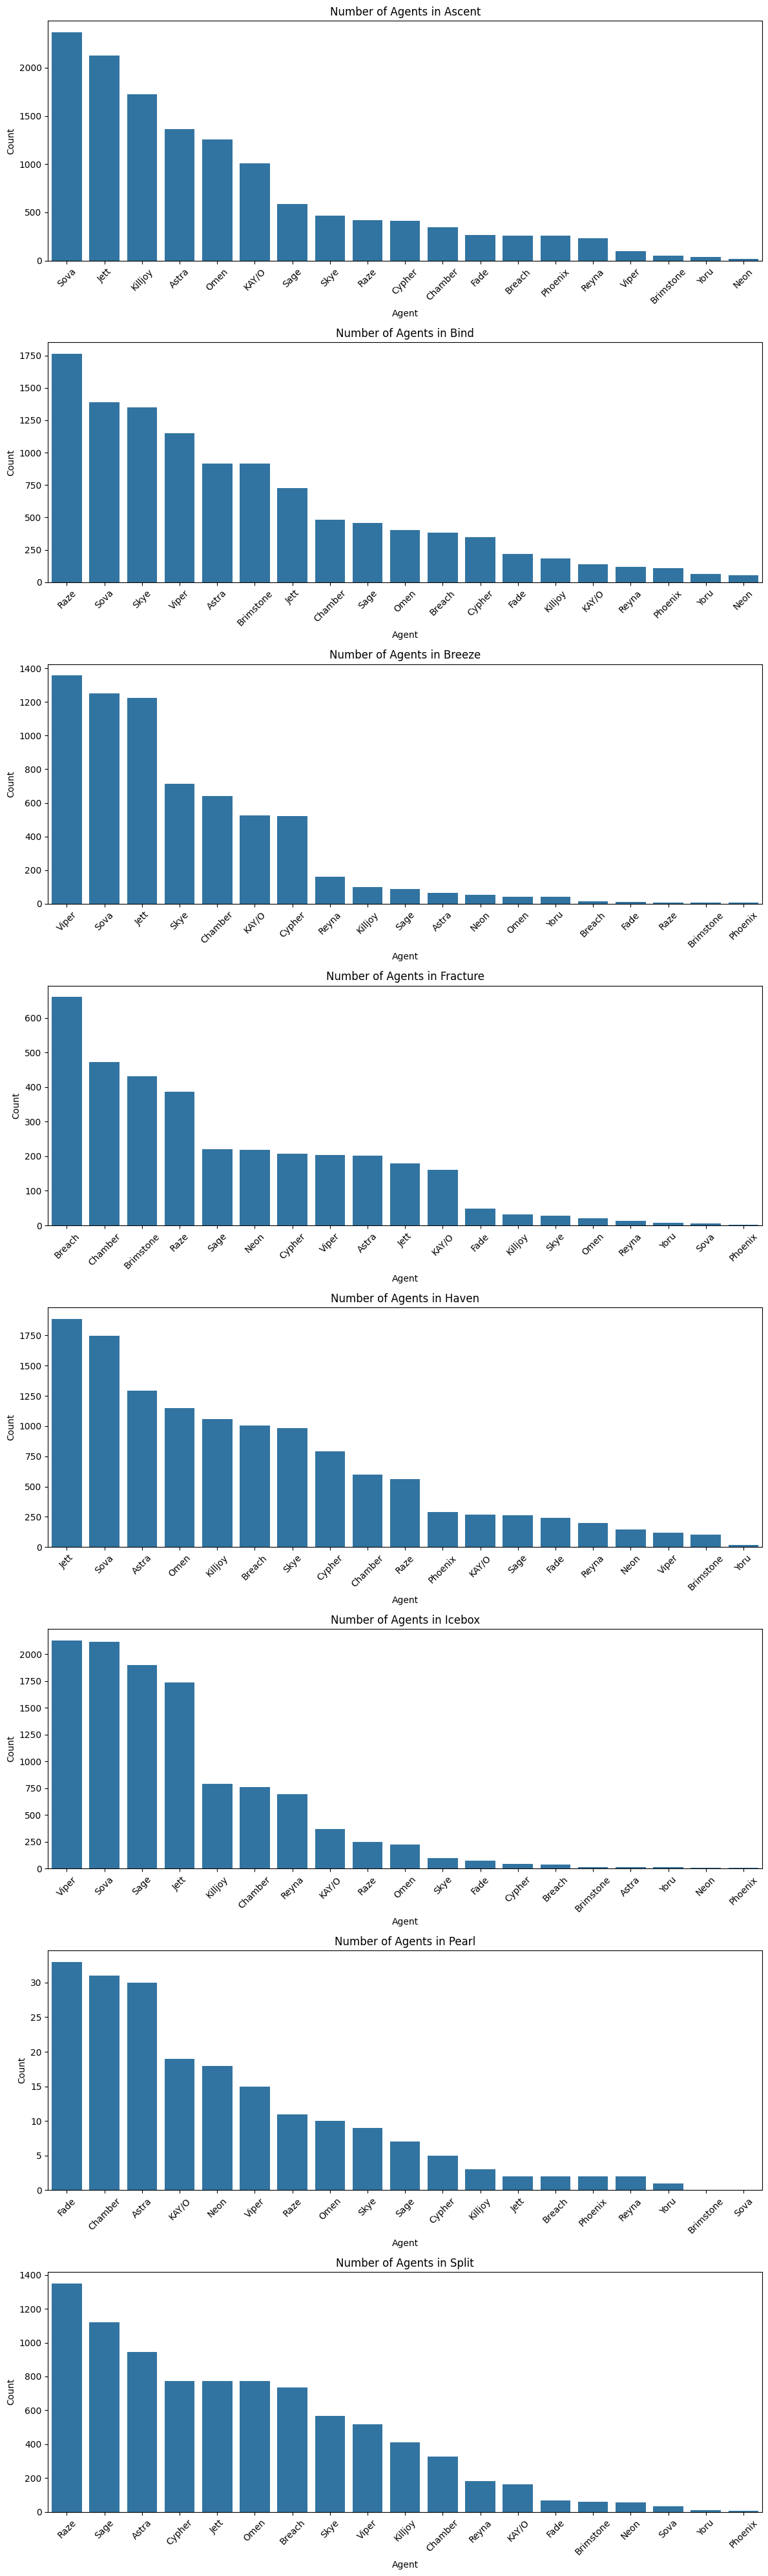

In [14]:
# 맵별 요원 출현 수 계산 ver1
map_agent_counts = df.groupby('map')['사용요원'].value_counts().unstack().fillna(0)

# 격자 형태로 여러 맵을 동시에 시각화
maps = map_agent_counts.index
num_maps = len(maps)
fig, axes = plt.subplots(num_maps, 1, figsize=(12, num_maps * 5))

for i, map_name in enumerate(maps):
    map_df = map_agent_counts.loc[map_name].sort_values(ascending=False)
    sns.barplot(x=map_df.index, y=map_df.values, ax=axes[i])
    axes[i].set_title(f'Number of Agents in {map_name}')
    axes[i].set_xlabel('Agent')
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(map_df.index, rotation=45)

plt.tight_layout()
plt.show()

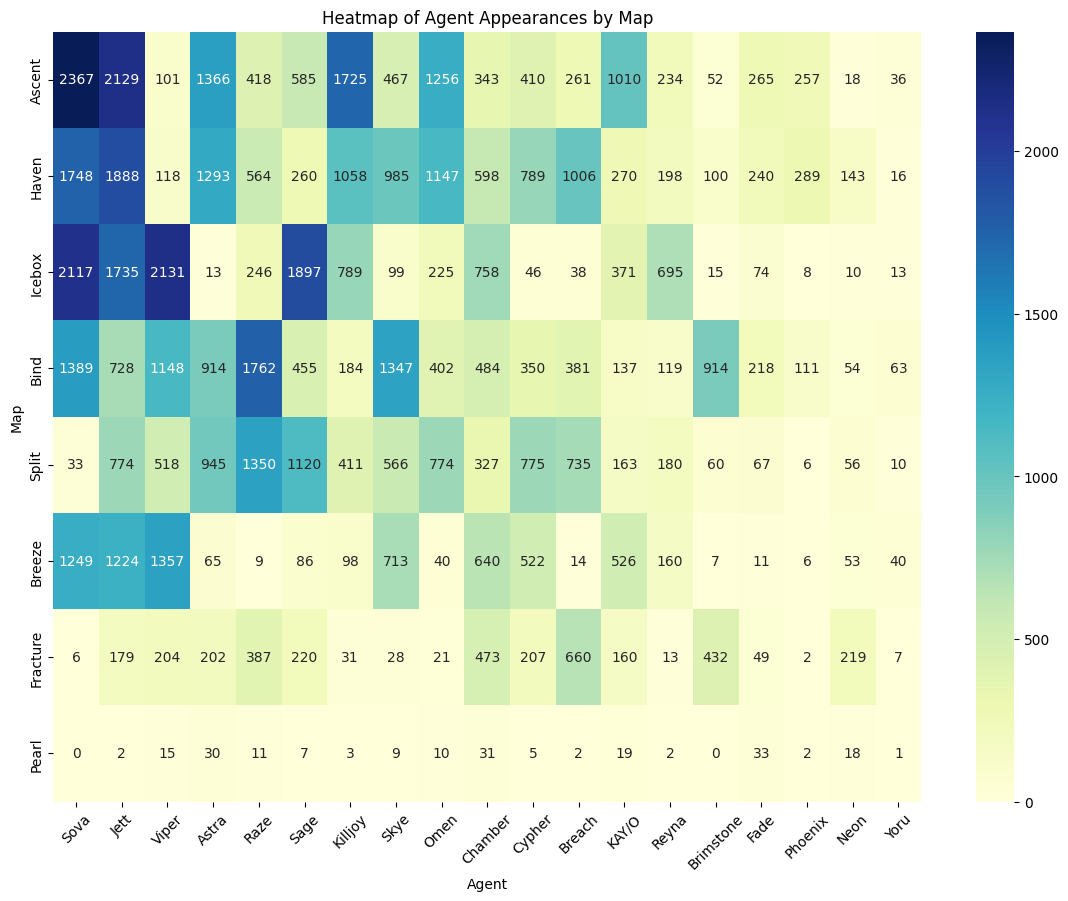

In [15]:
# 맵별 요원 출현 수 계산 ver2
map_agent_counts = df.groupby('map')['사용요원'].value_counts().unstack().fillna(0)
# 데이터 타입을 정수로 변환
map_agent_counts = map_agent_counts.astype(int)

# 맵별 출현 빈도 계산 및 내림차순 정렬
map_counts = map_agent_counts.sum(axis=1).sort_values(ascending=False)
map_agent_counts = map_agent_counts.loc[map_counts.index]

# 요원별 출현 빈도 계산 및 내림차순 정렬
agent_counts = map_agent_counts.sum(axis=0).sort_values(ascending=False)
map_agent_counts = map_agent_counts[agent_counts.index]

# 히트맵 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(map_agent_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Agent Appearances by Map')
plt.xlabel('Agent')
plt.ylabel('Map')
plt.xticks(rotation=45)
plt.show()

Spva와 jett이 대중적으로 활용되는 agent라고 생각됨

#### 3. 타격대 요원을 픽했을 경우, 타격대의 킬수나 헤드샷율이 다른 직업군보다 승률에 많은 영향을 끼칠까?

Win - Duelist means:
 K       6.655405
Hs%    23.486486
dtype: float64
Win - Non-Duelist means:
 K       6.122881
Hs%    25.442797
dtype: float64
Lose - Duelist means:
 K       5.388889
Hs%    23.685185
dtype: float64
Lose - Non-Duelist means:
 K       5.086022
Hs%    24.623656
dtype: float64
T-test for Win K: TtestResult(statistic=2.1368874098317745, pvalue=0.03299914268516773, df=618.0)
T-test for Win Hs%: TtestResult(statistic=-1.7372957676940084, pvalue=0.08283318233555627, df=618.0)
T-test for Lose K: TtestResult(statistic=0.7950347813204958, pvalue=0.4273853948155697, df=238.0)
T-test for Lose Hs%: TtestResult(statistic=-0.5130466417297816, pvalue=0.6083945713249015, df=238.0)


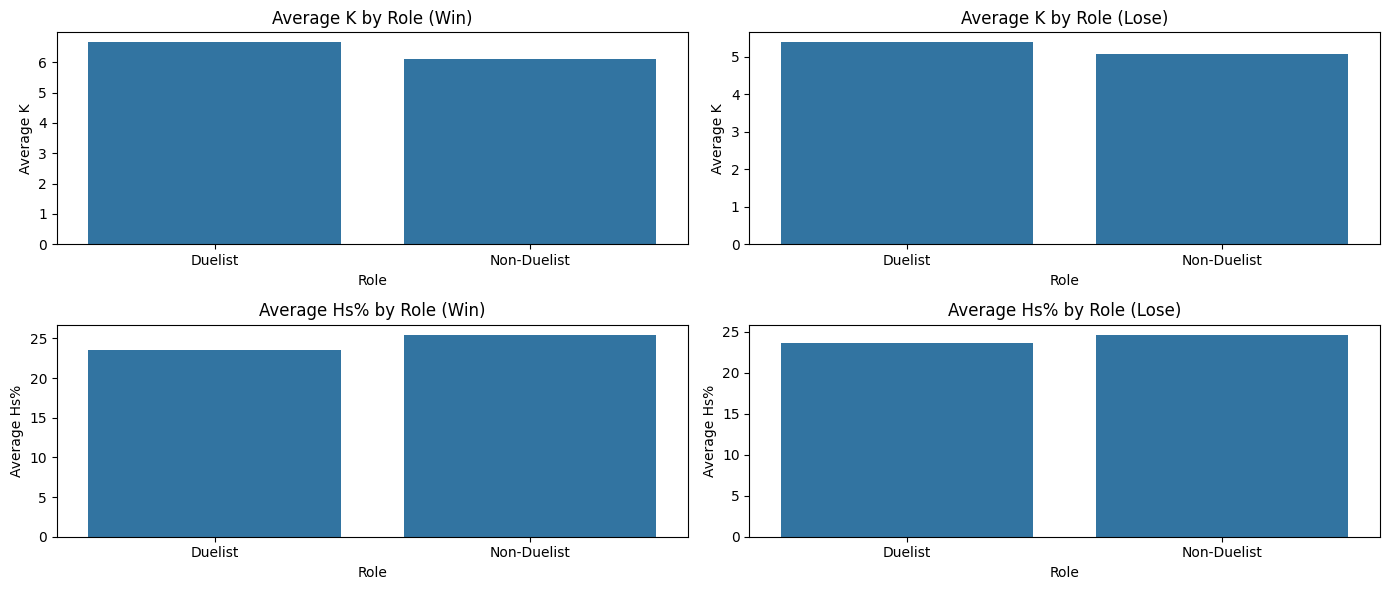

In [16]:
# 타격대와 비타격대 데이터 분리
duelist_df = df[df['직업군'] == 'Duelist']
non_duelist_df = df[df['직업군'] != 'Duelist']

# 승리와 패배 데이터 분리
win_df = df[df['WL'] == 1]
lose_df = df[df['WL'] == 0]

duelist_win_df = win_df[win_df['직업군'] == 'Duelist']
non_duelist_win_df = win_df[win_df['직업군'] != 'Duelist']

duelist_lose_df = lose_df[lose_df['직업군'] == 'Duelist']
non_duelist_lose_df = lose_df[lose_df['직업군'] != 'Duelist']


# 승리 시 타격대와 비타격대의 킬수, 헤드샷율, 승률 비교
win_duelist_means = duelist_win_df[['K', 'Hs%']].mean()
win_non_duelist_means = non_duelist_win_df[['K', 'Hs%']].mean()

print("Win - Duelist means:\n", win_duelist_means)
print("Win - Non-Duelist means:\n", win_non_duelist_means)

# 패배 시 타격대와 비타격대의 킬수, 헤드샷율, 승률 비교
lose_duelist_means = duelist_lose_df[['K', 'Hs%']].mean()
lose_non_duelist_means = non_duelist_lose_df[['K', 'Hs%']].mean()

print("Lose - Duelist means:\n", lose_duelist_means)
print("Lose - Non-Duelist means:\n", lose_non_duelist_means)

# 승리 시 통계적 테스트
t_test_win_k = ttest_ind(duelist_win_df['K'], non_duelist_win_df['K'])
t_test_win_hs = ttest_ind(duelist_win_df['Hs%'], non_duelist_win_df['Hs%'])

print("T-test for Win K:", t_test_win_k)
print("T-test for Win Hs%:", t_test_win_hs)

# 패배 시 통계적 테스트
t_test_lose_k = ttest_ind(duelist_lose_df['K'], non_duelist_lose_df['K'])
t_test_lose_hs = ttest_ind(duelist_lose_df['Hs%'], non_duelist_lose_df['Hs%'])

print("T-test for Lose K:", t_test_lose_k)
print("T-test for Lose Hs%:", t_test_lose_hs)

# 시각화 - 타격대와 비타격대의 킬수, 헤드샷율 비교
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.barplot(x=['Duelist', 'Non-Duelist'], y=[win_duelist_means['K'], win_non_duelist_means['K']])
plt.title('Average K by Role (Win)')
plt.xlabel('Role')
plt.ylabel('Average K')

plt.subplot(2, 2, 2)
sns.barplot(x=['Duelist', 'Non-Duelist'], y=[lose_duelist_means['K'], lose_non_duelist_means['K']])
plt.title('Average K by Role (Lose)')
plt.xlabel('Role')
plt.ylabel('Average K')

plt.subplot(2, 2, 3)
sns.barplot(x=['Duelist', 'Non-Duelist'], y=[win_duelist_means['Hs%'], win_non_duelist_means['Hs%']])
plt.title('Average Hs% by Role (Win)')
plt.xlabel('Role')
plt.ylabel('Average Hs%')

plt.subplot(2, 2, 4)
sns.barplot(x=['Duelist', 'Non-Duelist'], y=[lose_duelist_means['Hs%'], lose_non_duelist_means['Hs%']])
plt.title('Average Hs% by Role (Lose)')
plt.xlabel('Role')
plt.ylabel('Average Hs%')

plt.tight_layout()
plt.show()


T-test for Win K: TtestResult(statistic=2.1368874098317745, pvalue=0.03299914268516773, df=618.0)<br>
T-test for Win Hs%: TtestResult(statistic=-1.7372957676940084, pvalue=0.08283318233555627, df=618.0)<br>
T-test for Lose K: TtestResult(statistic=0.7950347813204958, pvalue=0.4273853948155697, df=238.0)<br>
T-test for Lose Hs%: TtestResult(statistic=-0.5130466417297816, pvalue=0.6083945713249015, df=238.0) <br>

T테스트 결과, p-value값이 승리할 때 타격대의 킬수에서만 유의한 영향을 미친다, <br>
 **결론: 타격대의 킬과 승리는 영향력이 있다고 할 수 있다.**

#### 5. 선수의 ACS KDA ADR과 헤드샷율이 승률에 어떤 영향을 미치는지, 가장 큰 영향을 미치는 요소는?

          ACS         K         D         A       ADR       Hs%        WL
ACS  1.000000  0.831780 -0.161223  0.015794  0.932080  0.135191  0.321045
K    0.831780  1.000000  0.155325  0.080542  0.773281  0.155804  0.542341
D   -0.161223  0.155325  1.000000  0.102066 -0.145394 -0.057242 -0.032849
A    0.015794  0.080542  0.102066  1.000000  0.057104 -0.107073  0.336718
ADR  0.932080  0.773281 -0.145394  0.057104  1.000000  0.156724  0.312267
Hs%  0.135191  0.155804 -0.057242 -0.107073  0.156724  1.000000  0.020542
WL   0.321045  0.542341 -0.032849  0.336718  0.312267  0.020542  1.000000


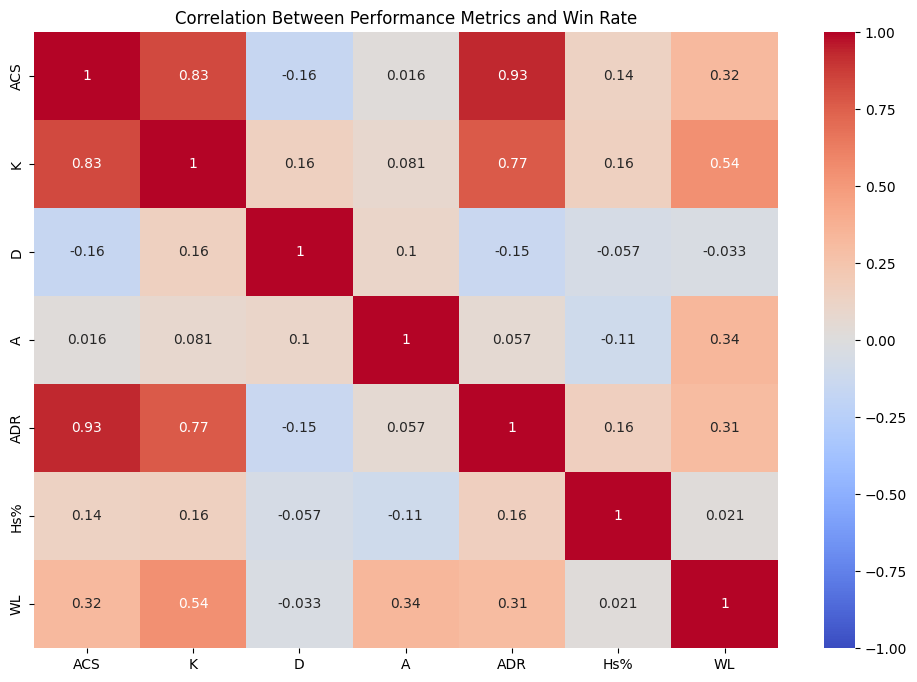

In [17]:
# 선수의 성과와 승률의 상관관계 분석
performance_metrics = df[['ACS', 'K', 'D', 'A', 'ADR', 'Hs%', 'WL']].corr()
print(performance_metrics)

# 성과와 승률의 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(performance_metrics, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Performance Metrics and Win Rate')
plt.show()

상관관계 분석 결과
당연한 이야기지만, ASC, Kill, ADR은 상당한 연관성이 있어보인다.


K      0.542341
A      0.336718
ACS    0.321045
ADR    0.312267
Hs%    0.020542
D     -0.032849
Name: WL, dtype: float64


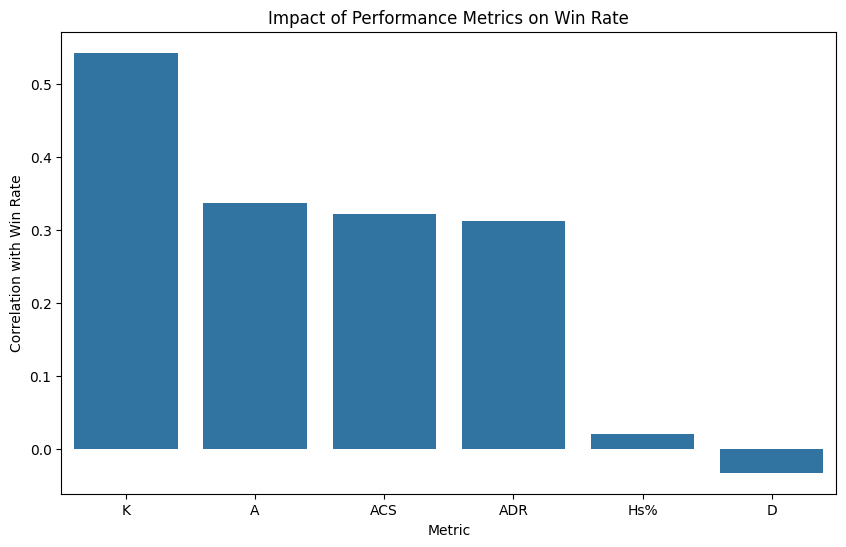

In [18]:
# 가장 큰 영향을 미치는 요소 확인
impact_factors = performance_metrics['WL'].drop('WL').sort_values(ascending=False)
print(impact_factors)

# 시각화 - 영향 요인
plt.figure(figsize=(10, 6))
sns.barplot(x=impact_factors.index, y=impact_factors.values)
plt.title('Impact of Performance Metrics on Win Rate')
plt.xlabel('Metric')
plt.ylabel('Correlation with Win Rate')
plt.show()

선형회귀분석결과

                            OLS Regression Results                            
Dep. Variable:                     WL   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                 1.212e+04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:52:51   Log-Likelihood:            -1.5835e+05
No. Observations:               67840   AIC:                         3.167e+05
Df Residuals:                   67833   BIC:                         3.168e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5473      0.069    167.154      0.0

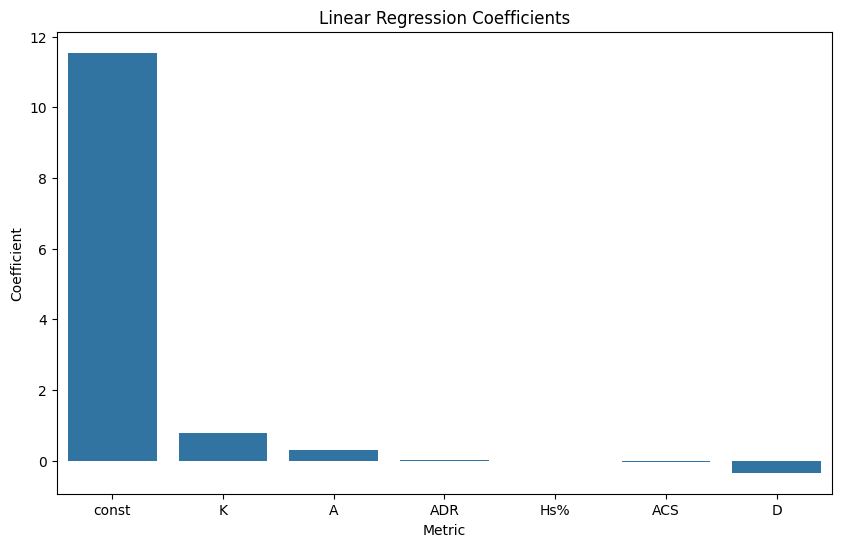

In [19]:
# 선형 회귀 분석
X = df[['ACS', 'K', 'D', 'A', 'ADR', 'Hs%']]
y = df['WL']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# 회귀 계수 시각화
coef = model.params.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=coef.index, y=coef.values)
plt.title('Linear Regression Coefficients')
plt.xlabel('Metric')
plt.ylabel('Coefficient')
plt.show()

Optimization terminated successfully.
         Current function value: 0.455865
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    Win   No. Observations:                67840
Model:                          Logit   Df Residuals:                    67833
Method:                           MLE   Df Model:                            6
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.3423
Time:                        03:52:52   Log-Likelihood:                -30926.
converged:                       True   LL-Null:                       -47023.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1285      0.081     63.157      0.000       4.969       5.288
ACS           -0.0155      0.

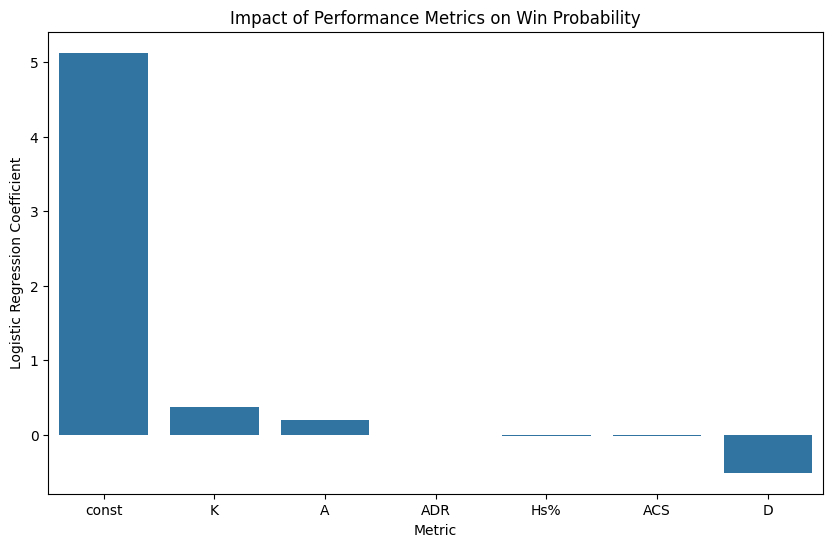

In [20]:
# 독립변수와 종속변수 설정
X = df[['ACS', 'K', 'D', 'A', 'ADR', 'Hs%']]
y = df['Win']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X).fit()

# 로지스틱 회귀 결과 출력
print(model.summary())

# 가장 큰 영향을 미치는 요소 확인
coef = model.params.sort_values(ascending=False)
print(coef)

# 시각화 - 영향 요인
plt.figure(figsize=(10, 6))
sns.barplot(x=coef.index, y=coef.values)
plt.title('Impact of Performance Metrics on Win Probability')
plt.xlabel('Metric')
plt.ylabel('Logistic Regression Coefficient')
plt.show()

로지스틱 회귀분석의 결과 <br>
Pseudo R-squ.:0.1525 ==> 설명력이 약하다<br>
p-value는 ADR을 제외하고 모두 0.05 이하이기 때문에 통계적으로 유의하다. <br>
아래의 결과를 바탕으로, kill과 assist 는 승패에 긍정적인 영향을, death는 부정적인 영향을 준다. <br>
**죽지 않는게 승패에 가장 큰 영향을 주는 걸수도...** <br>
K        0.197365<br>
A        0.107114<br>
ADR      0.000625<br>
Hs%     -0.008011<br>
ACS     -0.009240<br>
D       -0.272863<br>